<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-8546-1658923368/blob/main/Assignment/Assignment_2_Sukirdhapriya_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Load Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset/Churn_Modelling.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


2.Visualizations

A.Univariate Analysis

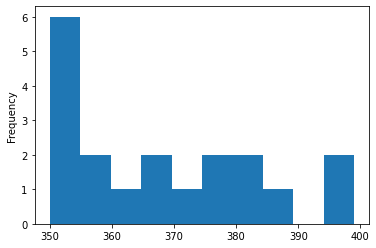

In [ ]:
import matplotlib.pyplot as plt

df[df['CreditScore'] < 400]['CreditScore'].plot.hist()

B.Bi - Variate Analysis

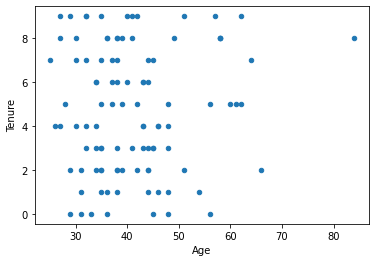

In [ ]:
df[df['Tenure'] < 10].sample(100).plot.scatter(x='Age', y='Tenure')

C.Multi - Variate Analysis

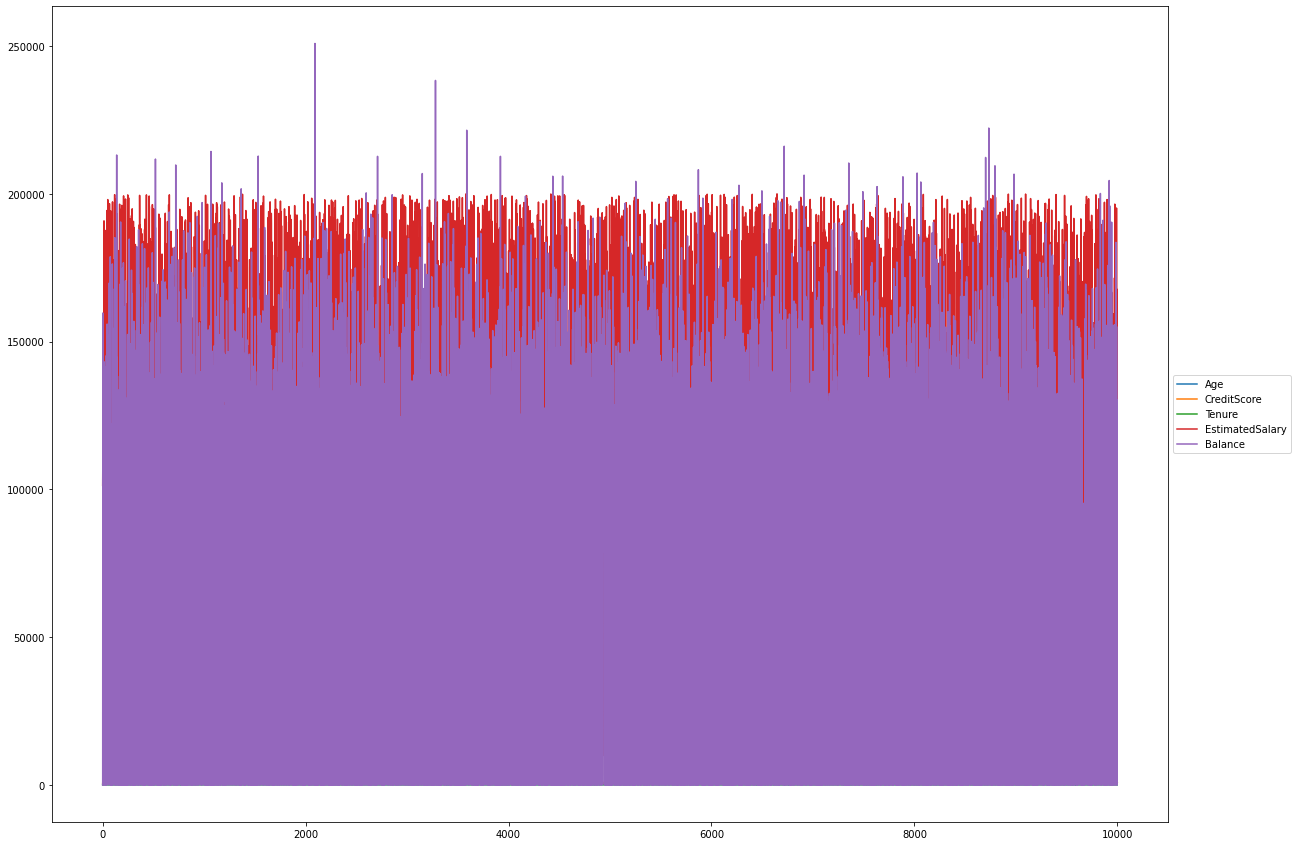

In [ ]:
ax = df[["Age","CreditScore","Tenure","EstimatedSalary","Balance"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

3.Descriptive statistics on the dataset

In [ ]:
import numpy as np
print(df['Tenure'].mean())

5.0128


In [ ]:
import numpy as np
print(df['Tenure'].sum())

50128


4.Handle the Missing values

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

RowNumber        0
CustomerId       0
Surname          0
CreditScore      0
Geography        0
Gender           0
Age              0
Tenure           0
Balance          0
NumOfProducts    0
dtype: int64

5.Find the outliers and replace the outliers

In [ ]:
median = float(df['Tenure'].median())
df["Tenure"] = np.where(df["Tenure"] > median, median, df['Tenure'])
print(median)

5.0


6.Categorical columns

In [ ]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     5.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995     5.0       0.00              2          1               0   
9996     5.0   57369.61              1          1               1   
9997     5.0       0.00              1          0               1   
9998     3.0   75075.31              2          1               0   
9999     4.0  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

7.Dependent and independent variables

A.Splitting independent variables

In [ ]:
X = df.iloc[:, :-3].values
print(X)

[[1 15634602 'Hargrave' ... 0.0 1 1]
 [2 15647311 'Hill' ... 83807.86 1 0]
 [3 15619304 'Onio' ... 159660.8 3 1]
 ...
 [9998 15584532 'Liu' ... 0.0 1 0]
 [9999 15682355 'Sabbatini' ... 75075.31 2 1]
 [10000 15628319 'Walker' ... 130142.79 1 1]]


B.Splitting dependent variables

In [ ]:
Y = df.iloc[:, -3].values
print(Y)

[1 1 0 ... 1 0 0]


8.Scale the variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
print(pd)

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>


In [ ]:
df[["CreditScore", "Age"]] = min_max_scaler.fit_transform(df[["CreditScore", "Age"]])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave        0.538    France  Female   
1             2    15647311       Hill        0.516     Spain  Female   
2             3    15619304       Onio        0.304    France  Female   
3             4    15701354       Boni        0.698    France  Female   
4             5    15737888   Mitchell        1.000     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku        0.842    France    Male   
9996       9997    15569892  Johnstone        0.332    France    Male   
9997       9998    15584532        Liu        0.718    France  Female   
9998       9999    15682355  Sabbatini        0.844   Germany    Male   
9999      10000    15628319     Walker        0.884    France  Female   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.324324     2.0       0.00           

9.Split the data into training and testing

In [ ]:
training_data = df.sample(frac=0.4, random_state=20)
testing_data = df.drop(training_data.index)
print(training_data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
9957       9958    15672237     Oluchi        0.566    France    Male   
1687       1688    15589348   Le Grand        1.000     Spain    Male   
2116       2117    15671609  Ibeabuchi        0.702    France    Male   
231         232    15627000    Freeman        0.520    France    Male   
2780       2781    15790235      Hsing        0.856     Spain    Male   
...         ...         ...        ...          ...       ...     ...   
8792       8793    15766137       Muir        0.294    France    Male   
2316       2317    15624388  Henderson        0.598   Germany  Female   
7001       7002    15662854      Manna        0.662   Germany    Male   
6072       6073    15803908         Fu        0.556    France    Male   
2408       2409    15754112   Musgrove        0.606     Spain    Male   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9957  0.094595     1.0       0.00           

In [ ]:
print(testing_data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
1             2    15647311       Hill        0.516     Spain  Female   
2             3    15619304       Onio        0.304    France  Female   
4             5    15737888   Mitchell        1.000     Spain  Female   
5             6    15574012        Chu        0.590     Spain    Male   
7             8    15656148     Obinna        0.052   Germany  Female   
...         ...         ...        ...          ...       ...     ...   
9993       9994    15569266     Rahman        0.588    France    Male   
9995       9996    15606229   Obijiaku        0.842    France    Male   
9996       9997    15569892  Johnstone        0.332    France    Male   
9997       9998    15584532        Liu        0.718    France  Female   
9999      10000    15628319     Walker        0.884    France  Female   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1     0.310811     1.0   83807.86           